## Mini Project: Language Translation by using NLP

#### Import Libraries and Download Required Resources

In [1]:
# Install required libraries if not already installed
# pip install nltk spacy textblob scikit-learn matplotlib wordcloud

import nltk
import spacy
from textblob import TextBlob
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, ne_chunk
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to C:\Users\Kavya
[nltk_data]     Venkatesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kavya Venkatesh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Kavya
[nltk_data]     Venkatesh\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Kavya
[nltk_data]     Venkatesh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

#### Input the Sample Text

In [2]:
text = "Apple is looking at buying a startup in the UK next year."
print("Original Text:\n", text)


Original Text:
 Apple is looking at buying a startup in the UK next year.


#### Tokenization

In [3]:
# Word Tokenization
word_tokens = word_tokenize(text)
print("\nWord Tokens:\n", word_tokens)

# Sentence Tokenization
sent_tokens = sent_tokenize(text)
print("\nSentence Tokens:\n", sent_tokens)



Word Tokens:
 ['Apple', 'is', 'looking', 'at', 'buying', 'a', 'startup', 'in', 'the', 'UK', 'next', 'year', '.']

Sentence Tokens:
 ['Apple is looking at buying a startup in the UK next year.']


#### Part-of-Speech (POS) Tagging

In [4]:
pos_tags = pos_tag(word_tokens)
print("\nPart-of-Speech Tags:\n", pos_tags)



Part-of-Speech Tags:
 [('Apple', 'NNP'), ('is', 'VBZ'), ('looking', 'VBG'), ('at', 'IN'), ('buying', 'VBG'), ('a', 'DT'), ('startup', 'NN'), ('in', 'IN'), ('the', 'DT'), ('UK', 'NNP'), ('next', 'JJ'), ('year', 'NN'), ('.', '.')]


#### Named Entity Recognition (NER)

In [5]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text} → {ent.label_}")



Named Entities:
Apple → ORG
UK → GPE
next year → DATE


#### Chunking (Noun Phrases)

In [6]:
print("\nNoun Phrase Chunks:")
for chunk in doc.noun_chunks:
    print(chunk.text)



Noun Phrase Chunks:
Apple
a startup
the UK


#### Translation using TextBlob

#### TF-IDF (Term Frequency-Inverse Document Frequency

In [10]:
corpus = [text]  # List of documents
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

# Print words and their TF-IDF scores
print("\nTF-IDF Scores:")
for word, score in zip(vectorizer.get_feature_names_out(), X.toarray()[0]):
    print(f"{word}: {score:.4f}")



TF-IDF Scores:
apple: 0.3015
at: 0.3015
buying: 0.3015
in: 0.3015
is: 0.3015
looking: 0.3015
next: 0.3015
startup: 0.3015
the: 0.3015
uk: 0.3015
year: 0.3015


#### Visualization of Word Frequency

####  Bar Chart of Word Frequency

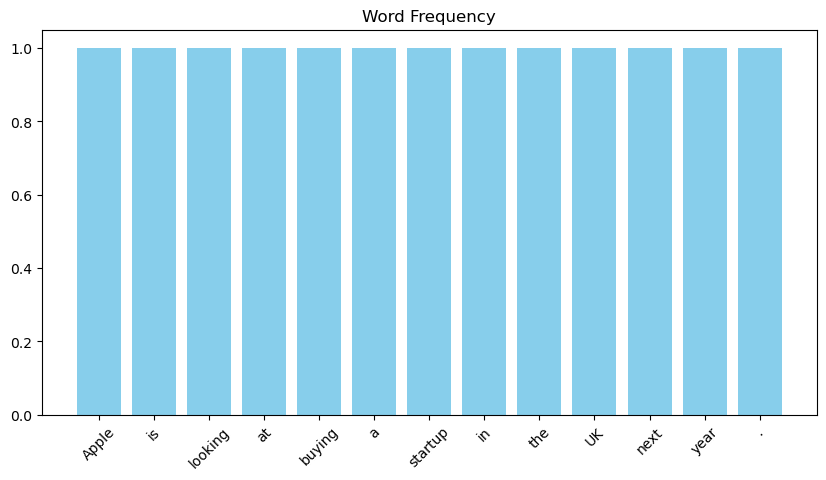

In [11]:
word_freq = Counter(word_tokens)

# Plotting
plt.figure(figsize=(10, 5))
plt.bar(word_freq.keys(), word_freq.values(), color='skyblue')
plt.title("Word Frequency")
plt.xticks(rotation=45)
plt.show()


#### Word Cloud

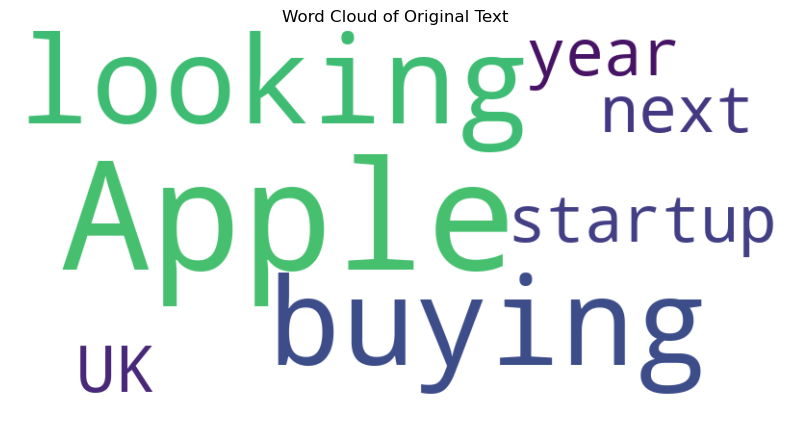

In [12]:
wc = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Original Text")
plt.show()
